# 1. Data Reading

## 1.1 Persiapan data
Download data bike sharing di https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

Extract file didalamnya dan letakkan di folder yang sama dengan file notebook ini

## 1.2 Working Directory

Working directory adalah lokasi file python/ipynb yang sedang digunakan.  
Ketika kita ingin membaca/menyimpan data, kita perlu memahami konsep working directory.

Ada 2 cara untuk menulis lokasi file di komputer kita :
- Absolute Path : Dimulai dari folder terluar di komputer.   
  contoh : `C:\\Users\\vinso\\dataset\\growia.csv`
- Relative Path  : Dimulai dari lokasi file / ipynb. Misal saya membuat file notebook ini di `C:\\Users\\vinso` dan ingin membaca file `growia.csv`, maka relative path nya adalah `./dataset/growia.csv`

Beberapa notasi :
- `../data.csv` : simbol `..` berarti folder sebelumnya
- `~/data.csv` : simbol `~` berarti home directory.

In [90]:
import os
os.getcwd() # Mengetahui working directory sekarang

'C:\\Users\\Ichsa\\Downloads\\GROWIA\\Modul 6. Pemrograman Python\\5xeC0oOGSRa28kpvZLsT_File Notebook Python Growia\\File Notebook Python Growia'

In [91]:
os.listdir() # Melihat daftar file di working directory sekarang

['.ipynb_checkpoints',
 '1. Variable.ipynb',
 '10. Practical Data Analytic - Customer Segmentation.ipynb',
 '11. Practical Data Analytic - RFM Analysis.ipynb',
 '2. Operasi.ipynb',
 '3. Conditional.ipynb',
 '4. For Loop.ipynb',
 '5. Function.ipynb',
 '6. Common Data Structure.ipynb',
 '6.2 Common Data Structure - Dictionary & Set.ipynb',
 '7. pandas - data analysis.ipynb',
 '8. Data Visualization with seaborn and matplotlib.ipynb',
 '9. Practical Data Analytic - Funnel Analysis.ipynb',
 'Environment.ipynb',
 'hour.csv']

## 1.3 Membaca data dengan pandas

Gunakan fungsi read_csv untuk membaca data dengan format `csv`. `csv (comma separated value)` adalah tipe data yang sering digunakan karena tidak memerlukan software spesifik untuk membukanya. Silahkan bukan `file.csv` dengan text editor seperti `notepad` atau `text edit` untuk mengetahui kenapa dinamakan file `csv`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hour.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'hour.csv'

Tipe data di pandas : 
- integer (16/32/64)
- float (16/32/64)
- bool 
- datetime (dengan / tanpa timezone)
- timedelta
- category (ordered / unordered)
- object : semua selain diatas. string, list, campuran

In [4]:
# Pahami tipe data setiap kolom
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.tail(10)

# 2 Data Cleansing

Data cleansing dapat mencakup :  
a. Membuang kolom yang tidak berarti  
b. Merapihkan nama kolom  
c. Memastikan setiap kolom terbaca sesuai dengan tipe yang seharusnya  
d. Merapihkan/mapping nilai kolom supaya lebih mudah dibaca  
e. Mengecek apakah ada observasi/nilai yang hilang  
f. Mengecek apakah ada nilai yang ekstrim  

## a. Membuang kolom yang tidak diperlukan

In [6]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
df = df.drop(columns = ['instant'])
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## b. Merapihkan nama kolom

In [5]:
df.rename(columns={
    'dteday' : 'date',
    'hr' : 'hour',
    'yr' : 'year',
    'mnth' : 'month',
},inplace=True)

df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## c. Membuat kolom dengan tipe datetime

Lebih baik menyimpan data waktu dengan kolom datetime karena kolom dengan tipe datetime memiliki banyak fungsi yang bisa membantu dalam mengolah data tipe waktu seperti menghitung hari, menjumlahkan hari, mencari komponen waktu seperti hari tanggal bulan dan lainnya.

In [9]:
# YYYY-MM-DD HH:MM

In [10]:
df['date'] + " " + df['hour'].astype(str).str.zfill(2) + ":00"

0        2011-01-01 00:00
1        2011-01-01 01:00
2        2011-01-01 02:00
3        2011-01-01 03:00
4        2011-01-01 04:00
               ...       
17374    2012-12-31 19:00
17375    2012-12-31 20:00
17376    2012-12-31 21:00
17377    2012-12-31 22:00
17378    2012-12-31 23:00
Length: 17379, dtype: object

In [7]:
df['datetime'] = df['date'] + " "+ df['hour'].astype(str).str.zfill(2) + ":00"

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: datetime64[ns]

## d. Memetakan nilai suatu kolom

In [15]:
df

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


In [10]:
df['holiday'] = df['holiday'].map({0:False, 1 :True})

In [11]:
df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,False,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,False,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,False,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,False,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,False,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,False,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,False,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,False,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,False,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


 temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
 untuk mengembalikan temperatur ke skala normal, gunakan rumus t_awal = t_baru*(tmax-tmin) + tmin

In [13]:
df['temp'] = df['temp'] * (39 - (-8)) + -8

In [14]:
df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,False,6,0,1,146.16,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,False,6,0,1,101.98,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,False,6,0,1,101.98,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,False,6,0,1,146.16,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,False,6,0,1,146.16,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,False,1,1,2,190.34,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,False,1,1,2,190.34,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,False,1,1,1,190.34,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,False,1,1,1,190.34,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


## e. Membersihkan missing value / observation

Pada data yang bersifat time series, pastikan bahwa datanya lengkap

In [16]:
list_waktu = pd.date_range(df['datetime'].min(),df['datetime'].max(),freq='1h')
list_waktu

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=17544, freq='h')

In [17]:
df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,False,6,0,1,146.16,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,False,6,0,1,101.98,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,False,6,0,1,101.98,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,False,6,0,1,146.16,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,False,6,0,1,146.16,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,False,1,1,2,190.34,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,False,1,1,2,190.34,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,False,1,1,1,190.34,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,False,1,1,1,190.34,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


In [18]:
kolom_waktu_lengkap = pd.DataFrame(list_waktu,columns=['datetime'])
kolom_waktu_lengkap

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
17539,2012-12-31 19:00:00
17540,2012-12-31 20:00:00
17541,2012-12-31 21:00:00
17542,2012-12-31 22:00:00


In [19]:
df = kolom_waktu_lengkap.merge(df,on=['datetime'],how='left')

In [20]:
df

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1.0,2011-01-01,1.0,0.0,1.0,0.0,False,6.0,0.0,1.0,146.16,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,2.0,2011-01-01,1.0,0.0,1.0,1.0,False,6.0,0.0,1.0,101.98,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,3.0,2011-01-01,1.0,0.0,1.0,2.0,False,6.0,0.0,1.0,101.98,0.2727,0.80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,4.0,2011-01-01,1.0,0.0,1.0,3.0,False,6.0,0.0,1.0,146.16,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,5.0,2011-01-01,1.0,0.0,1.0,4.0,False,6.0,0.0,1.0,146.16,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,17375.0,2012-12-31,1.0,1.0,12.0,19.0,False,1.0,1.0,2.0,190.34,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31 20:00:00,17376.0,2012-12-31,1.0,1.0,12.0,20.0,False,1.0,1.0,2.0,190.34,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31 21:00:00,17377.0,2012-12-31,1.0,1.0,12.0,21.0,False,1.0,1.0,1.0,190.34,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31 22:00:00,17378.0,2012-12-31,1.0,1.0,12.0,22.0,False,1.0,1.0,1.0,190.34,0.2727,0.56,0.1343,13.0,48.0,61.0


### Analisis missing value

In [21]:
df[df['cnt'].isna()]

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
29,2011-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2011-01-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2011-01-03 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2011-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2011-01-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,2012-10-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16251,2012-11-08 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16755,2012-11-29 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17356,2012-12-24 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.describe()

,datetime,instant,season,year,month,hour,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17544,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-01 11:30:00,8690.0000,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,1.425283,713.844655,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-339.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 17:45:00,4345.5000,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,367.060000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-01 11:30:00,8690.0000,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,1.000000,720.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 05:15:00,13034.5000,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,2.000000,1073.940000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 23:00:00,17379.0000,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,4.000000,1825.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,5017.0295,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.639357,425.356472,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
# Mengisi missing value dengan nilai konstant
df['cnt'] = df['cnt'].fillna(0)

# Mengisi missing value dengan nilai di baris sebelumnya
df['temp'] = df['temp'].ffill()

# Mengisi missing value dengan series
df['hour'] = df['hour'].fillna(df['datetime'].dt.hour) 

In [25]:
df['datetime'].dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
17539    19
17540    20
17541    21
17542    22
17543    23
Name: datetime, Length: 17544, dtype: int32

In [26]:
df[df['casual'].isna()]

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
29,2011-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,632.14,NaN,NaN,NaN,NaN,NaN,0.0
50,2011-01-03 02:00:00,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,57.80,NaN,NaN,NaN,NaN,NaN,0.0
51,2011-01-03 03:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,57.80,NaN,NaN,NaN,NaN,NaN,0.0
75,2011-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,-74.74,NaN,NaN,NaN,NaN,NaN,0.0
99,2011-01-05 03:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,-30.56,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,2012-10-30 12:00:00,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,587.96,NaN,NaN,NaN,NaN,NaN,0.0
16251,2012-11-08 03:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,278.70,NaN,NaN,NaN,NaN,NaN,0.0
16755,2012-11-29 03:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,101.98,NaN,NaN,NaN,NaN,NaN,0.0
17356,2012-12-24 04:00:00,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,57.80,NaN,NaN,NaN,NaN,NaN,0.0


## f. koreksi nilai ekstrim tak wajar

In [ ]:
df['weathersit'].value_counts()

In [ ]:
df.sort_values('weathersit',ascending=False)

# Challenge

In [122]:
# 1. Buat code untuk mengubah nama kolom "cnt" menjadi "total" 
df.rename(columns={'cnt':'total'},inplace=True)
df

,instant,dteday,season,yr,mnth,...,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,...,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,...,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,...,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,...,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,...,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,...,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,...,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,...,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,...,0.56,0.1343,13,48,61


In [36]:
# 2. Buat code untuk mengisi missing value yang tersisa. Cukup gunakan aturan sederhana berikut :
# date,year,month,weekday diinfer dari kolom datetime
# season,weathersit,atemp,hum,windspeed cukup ambil dari baris data terakhir
# casual dan registered yang missing diisi dengan nol

df['date'] = df['date'].fillna(df['datetime'].dt.date)
df['year'] = df['year'].fillna(df['datetime'].dt.year.map({2011:0,2012:1}))
df['month'] = df['month'].fillna(df['datetime'].dt.month)
df['weekday'] = df['weekday'].fillna(df['datetime'].dt.dayofweek)

for col in ['season','weathersit','atemp','hum','windspeed'] :
        df[col] = df[col].ffill()
    
df['casual'] = df['casual'].fillna(0)
df['registered'] = df['registered'].fillna(0)

In [38]:
df[df['holiday'].isna()]

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
29,2011-01-02 05:00:00,NaN,2011-01-02,1.0,0.0,1.0,5.0,NaN,6.0,NaN,2.0,632.14,0.4545,0.94,0.1940,0.0,0.0,0.0
50,2011-01-03 02:00:00,NaN,2011-01-03,1.0,0.0,1.0,2.0,NaN,0.0,NaN,1.0,57.80,0.1667,0.44,0.4179,0.0,0.0,0.0
51,2011-01-03 03:00:00,NaN,2011-01-03,1.0,0.0,1.0,3.0,NaN,0.0,NaN,1.0,57.80,0.1667,0.44,0.4179,0.0,0.0,0.0
75,2011-01-04 03:00:00,NaN,2011-01-04,1.0,0.0,1.0,3.0,NaN,1.0,NaN,1.0,-74.74,0.1515,0.63,0.1343,0.0,0.0,0.0
99,2011-01-05 03:00:00,NaN,2011-01-05,1.0,0.0,1.0,3.0,NaN,2.0,NaN,1.0,-30.56,0.1970,0.74,0.0896,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,2012-10-30 12:00:00,NaN,2012-10-30,4.0,1.0,10.0,12.0,NaN,1.0,NaN,3.0,587.96,0.4394,0.88,0.3582,0.0,0.0,0.0
16251,2012-11-08 03:00:00,NaN,2012-11-08,4.0,1.0,11.0,3.0,NaN,3.0,NaN,2.0,278.70,0.2879,0.49,0.2239,0.0,0.0,0.0
16755,2012-11-29 03:00:00,NaN,2012-11-29,4.0,1.0,11.0,3.0,NaN,3.0,NaN,1.0,101.98,0.2727,0.64,0.0000,0.0,0.0,0.0
17356,2012-12-24 04:00:00,NaN,2012-12-24,1.0,1.0,12.0,4.0,NaN,0.0,NaN,1.0,57.80,0.2576,0.75,0.0000,0.0,0.0,0.0


In [40]:
# 3. Buat code untuk memetakan season.  1 adalah winter, 2 adalah spring, 3 adalah summer dan 4 adalah autumn
df['season']=df['season'].map({1:'winter',2:'spring',3:'summer',4:'autumn'})
df

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1.0,2011-01-01,NaN,0.0,1.0,0.0,False,6.0,0.0,1.0,146.16,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,2.0,2011-01-01,NaN,0.0,1.0,1.0,False,6.0,0.0,1.0,101.98,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,3.0,2011-01-01,NaN,0.0,1.0,2.0,False,6.0,0.0,1.0,101.98,0.2727,0.80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,4.0,2011-01-01,NaN,0.0,1.0,3.0,False,6.0,0.0,1.0,146.16,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,5.0,2011-01-01,NaN,0.0,1.0,4.0,False,6.0,0.0,1.0,146.16,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,17375.0,2012-12-31,NaN,1.0,12.0,19.0,False,1.0,1.0,2.0,190.34,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31 20:00:00,17376.0,2012-12-31,NaN,1.0,12.0,20.0,False,1.0,1.0,2.0,190.34,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31 21:00:00,17377.0,2012-12-31,NaN,1.0,12.0,21.0,False,1.0,1.0,1.0,190.34,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31 22:00:00,17378.0,2012-12-31,NaN,1.0,12.0,22.0,False,1.0,1.0,1.0,190.34,0.2727,0.56,0.1343,13.0,48.0,61.0


In [43]:
# 4. berikut definisi atemp
# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# kembalikan kolom atemp ke nilai celcius yang sesungguhnya
df['temp'] = df['temp'] * (39 -(-8)) + -8

# 3. Data Filtering

In [44]:
df

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1.0,2011-01-01,NaN,0.0,1.0,0.0,False,6.0,0.0,1.0,15156713.68,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,2.0,2011-01-01,NaN,0.0,1.0,1.0,False,6.0,0.0,1.0,10569813.54,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,3.0,2011-01-01,NaN,0.0,1.0,2.0,False,6.0,0.0,1.0,10569813.54,0.2727,0.80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,4.0,2011-01-01,NaN,0.0,1.0,3.0,False,6.0,0.0,1.0,15156713.68,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,5.0,2011-01-01,NaN,0.0,1.0,4.0,False,6.0,0.0,1.0,15156713.68,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,17375.0,2012-12-31,NaN,1.0,12.0,19.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31 20:00:00,17376.0,2012-12-31,NaN,1.0,12.0,20.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31 21:00:00,17377.0,2012-12-31,NaN,1.0,12.0,21.0,False,1.0,1.0,1.0,19743613.82,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31 22:00:00,17378.0,2012-12-31,NaN,1.0,12.0,22.0,False,1.0,1.0,1.0,19743613.82,0.2727,0.56,0.1343,13.0,48.0,61.0


## 3.1 `Subsetting` : Mengambil bagian dari data

Gunakan `.iloc` untuk mengambil baris atau kolom berdasarkan posisi

In [45]:
last_day = df.iloc[-24: , : ] # secara baris, ambil 24 baris pertama. Secara kolom, ambil semua entry
last_day

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
17520,2012-12-31 00:00:00,17356.0,2012-12-31,NaN,1.0,12.0,0.0,False,1.0,1.0,1.0,1396013.26,0.1818,0.55,0.1940,4.0,30.0,34.0
17521,2012-12-31 01:00:00,17357.0,2012-12-31,NaN,1.0,12.0,1.0,False,1.0,1.0,1.0,1396013.26,0.1818,0.55,0.1940,6.0,13.0,19.0
17522,2012-12-31 02:00:00,17358.0,2012-12-31,NaN,1.0,12.0,2.0,False,1.0,1.0,1.0,-3190886.88,0.1667,0.59,0.1642,3.0,8.0,11.0
17523,2012-12-31 03:00:00,17359.0,2012-12-31,NaN,1.0,12.0,3.0,False,1.0,1.0,1.0,-3190886.88,0.1818,0.59,0.1045,0.0,1.0,1.0
17524,2012-12-31 04:00:00,17360.0,2012-12-31,NaN,1.0,12.0,4.0,False,1.0,1.0,1.0,-7777787.02,0.1667,0.69,0.1045,0.0,3.0,3.0
17525,2012-12-31 05:00:00,17361.0,2012-12-31,NaN,1.0,12.0,5.0,False,1.0,1.0,1.0,-3190886.88,0.1515,0.64,0.1940,0.0,9.0,9.0
17526,2012-12-31 06:00:00,17362.0,2012-12-31,NaN,1.0,12.0,6.0,False,1.0,1.0,1.0,-3190886.88,0.1667,0.64,0.1642,0.0,40.0,40.0
17527,2012-12-31 07:00:00,17363.0,2012-12-31,NaN,1.0,12.0,7.0,False,1.0,1.0,1.0,-3190886.88,0.1818,0.64,0.1343,2.0,83.0,85.0
17528,2012-12-31 08:00:00,17364.0,2012-12-31,NaN,1.0,12.0,8.0,False,1.0,1.0,1.0,-7777787.02,0.1515,0.69,0.1343,9.0,187.0,196.0
17529,2012-12-31 09:00:00,17365.0,2012-12-31,NaN,1.0,12.0,9.0,False,1.0,1.0,2.0,1396013.26,0.2121,0.64,0.1045,13.0,144.0,157.0


Gunakan `.loc` untuk mengambil baris atau kolom berdasarkan nama index/kolom

In [118]:
last_day.loc[17543,['datetime','total']]

datetime    2012-12-31 23:00:00
total                      49.0
Name: 17543, dtype: object

In [119]:
last_day.iloc[-1,[0,-1]] # bandingkan dengan loc

datetime    2012-12-31 23:00:00
total                      49.0
Name: 17543, dtype: object

## 3.2 `filtering` : Mengambil bagian dari data berdasarkan suatu kondisi

Single value filtering

In [120]:
df[df['weathersit']==4]  # Boolean indexing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [123]:
df.loc[df['weathersit']==4,'total'] # Boolean indexing bisa digabung dengan loc, tetapi tidak bisa digabung dengan iloc

585      36
8854    164
9123     23
Name: total, dtype: int64

In [50]:
df.query("weathersit==4")       

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
616,2011-01-26 16:00:00,586.0,2011-01-26,NaN,0.0,1.0,16.0,False,3.0,1.0,4.0,10569813.54,0.1970,0.93,0.3284,1.0,35.0,36.0
8970,2012-01-09 18:00:00,8855.0,2012-01-09,NaN,1.0,1.0,18.0,False,1.0,1.0,4.0,5982913.40,0.2273,0.86,0.0896,6.0,158.0,164.0
9241,2012-01-21 01:00:00,9124.0,2012-01-21,NaN,1.0,1.0,1.0,False,6.0,0.0,4.0,-7777787.02,0.1364,0.86,0.1940,1.0,22.0,23.0


In [51]:
df[df['hour'].between(19,23)]

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
19,2011-01-01 19:00:00,20.0,2011-01-01,NaN,0.0,1.0,19.0,False,6.0,0.0,3.0,56438814.94,0.4242,0.88,0.2537,6.0,31.0,37.0
20,2011-01-01 20:00:00,21.0,2011-01-01,NaN,0.0,1.0,20.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.87,0.2537,11.0,25.0,36.0
21,2011-01-01 21:00:00,22.0,2011-01-01,NaN,0.0,1.0,21.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.87,0.1940,3.0,31.0,34.0
22,2011-01-01 22:00:00,23.0,2011-01-01,NaN,0.0,1.0,22.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.94,0.2239,11.0,17.0,28.0
23,2011-01-01 23:00:00,24.0,2011-01-01,NaN,0.0,1.0,23.0,False,6.0,0.0,2.0,65612615.22,0.4545,0.88,0.2985,15.0,24.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,17375.0,2012-12-31,NaN,1.0,12.0,19.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31 20:00:00,17376.0,2012-12-31,NaN,1.0,12.0,20.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31 21:00:00,17377.0,2012-12-31,NaN,1.0,12.0,21.0,False,1.0,1.0,1.0,19743613.82,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31 22:00:00,17378.0,2012-12-31,NaN,1.0,12.0,22.0,False,1.0,1.0,1.0,19743613.82,0.2727,0.56,0.1343,13.0,48.0,61.0


In [52]:
df[df['hour'].between(19,23)]
df.query("hour.between(19,23)")

,datetime,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
19,2011-01-01 19:00:00,20.0,2011-01-01,NaN,0.0,1.0,19.0,False,6.0,0.0,3.0,56438814.94,0.4242,0.88,0.2537,6.0,31.0,37.0
20,2011-01-01 20:00:00,21.0,2011-01-01,NaN,0.0,1.0,20.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.87,0.2537,11.0,25.0,36.0
21,2011-01-01 21:00:00,22.0,2011-01-01,NaN,0.0,1.0,21.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.87,0.1940,3.0,31.0,34.0
22,2011-01-01 22:00:00,23.0,2011-01-01,NaN,0.0,1.0,22.0,False,6.0,0.0,2.0,51851914.80,0.4091,0.94,0.2239,11.0,17.0,28.0
23,2011-01-01 23:00:00,24.0,2011-01-01,NaN,0.0,1.0,23.0,False,6.0,0.0,2.0,65612615.22,0.4545,0.88,0.2985,15.0,24.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,17375.0,2012-12-31,NaN,1.0,12.0,19.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31 20:00:00,17376.0,2012-12-31,NaN,1.0,12.0,20.0,False,1.0,1.0,2.0,19743613.82,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31 21:00:00,17377.0,2012-12-31,NaN,1.0,12.0,21.0,False,1.0,1.0,1.0,19743613.82,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31 22:00:00,17378.0,2012-12-31,NaN,1.0,12.0,22.0,False,1.0,1.0,1.0,19743613.82,0.2727,0.56,0.1343,13.0,48.0,61.0


In [117]:
df[df['season'].isin(['spring','summer'])]
df.query('season.isin(["spring","summer"])')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Multiple condition

In [124]:
df[(df['hour']==23) & (df['month']==1)]
df.query("hour==23 & month==1")

KeyError: 'hour'

###  String filtering

In [ ]:
df[df['season'].str.contains('um', na=False)]

# Challenge

In [ ]:
# ambil semua record yang terekam pada tanggal 2011-12-25 dan 2011-12-26

In [115]:
print(df.columns.tolist())  # Lihat semua nama kolom yang ada

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [113]:
df[df['date'].isin(['2011-12-25','2011-12-26'])]

KeyError: 'date'

In [ ]:
# Ambil 10 baris dengan suhu tertinggi.

In [114]:
df.sort_values('temp').iloc[-10:]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13160,13161,2012-07-07,3,1,7,13,0,6,0,2,0.96,0.8636,0.31,0.2537,116,244,360
13159,13160,2012-07-07,3,1,7,12,0,6,0,1,0.96,0.8636,0.31,0.3582,124,218,342
13162,13163,2012-07-07,3,1,7,15,0,6,0,1,0.96,0.8485,0.26,0.0000,113,193,306
4936,4937,2011-07-29,3,0,7,14,0,5,1,1,0.96,0.8636,0.30,0.2239,34,114,148
4768,4769,2011-07-22,3,0,7,14,0,5,1,1,0.96,1.0000,0.48,0.2985,24,77,101
12971,12972,2012-06-29,3,1,6,16,0,5,1,1,0.96,0.9091,0.36,0.0000,59,292,351
12973,12974,2012-06-29,3,1,6,18,0,5,1,1,0.96,0.8636,0.31,0.0000,50,414,464
12970,12971,2012-06-29,3,1,6,15,0,5,1,1,0.96,0.9091,0.36,0.0000,47,183,230
12972,12973,2012-06-29,3,1,6,17,0,5,1,1,0.98,0.9242,0.34,0.1940,82,457,539
13163,13164,2012-07-07,3,1,7,16,0,6,0,1,1.00,0.8636,0.19,0.1642,102,192,294


In [71]:
#cek datanya rusak atau tidak
df = pd.read_csv('hour.csv', low_memory=False)
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# 4. Data Grouping & Aggregation

Agregasi adalah proses mengumpulkan sejumlah angka menjadi satu angka, contohnya seperti menghitung rataan

In [98]:
# 1. Cek nama kolom
print(df.columns)

# 2. Hilangkan spasi di kolom
df.columns = df.columns.str.strip()

# 3. Kalau kolom 'total' belum ada, buat dulu
if 'total' not in df.columns:
    df['total'] = df['casual'] + df['registered']

# 4. Cek rata-rata total
print(df['total'].mean())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
189.46308763450142


In [99]:
print(df['total'].mean())

189.46308763450142


In [105]:
# Beberapa cara melakukan agregasi yang hasilnya adalah series
#df.groupby('hour')['total'].mean()

# Correct groupby operation to get means by hour
#df.groupby('hour', as_index=False)[['registered','casual','total']].mean()

# Or alternatively:
df.groupby('hour').agg({'registered':'mean', 'casual':'mean', 'total':'mean'})

KeyError: 'hour'

In [106]:
print(df.head())  # Lihat 5 baris pertama

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  total  
0           1  0.24  0.2879  0.81        0.0       3          13   16     16  
1           1  0.22  0.2727  0.80        0.0       8          32   40     40  
2           1  0.22  0.2727  0.80        0.0       5          27   32     32  
3           1  0.24  0.2879  0.75        0.0       3          10   13     13  
4           1  0.24  0.2879  0.75        0.0       0           1    1      1  


In [107]:
print(df.columns)  # Lihat nama kolom yang tersedia

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'total'],
      dtype='object')


In [108]:
print(df.dtypes)   # Lihat tipe data masing-masing kolom

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
total           int64
dtype: object


In [110]:
import pandas as pd

In [ ]:
# Agregasi dengan beberapa fungsi
df_multi_level_column = df.groupby('season').agg({'temp':['min','max']})
df_multi_level_column

In [ ]:
df_multi_level_column[('temp','min')] # mengambil kolom yang multilevel

In [ ]:
def penjumlahan(x):
    return sum(x)

In [ ]:
df.groupby(['year','month']).agg({'total':['min','max','median','std','mean','sum',penjumlahan]})

## Mengambil observasi dengan nilai terbesar di setiap groupnya

Contoh anda diminta untuk mengambil baris data pada suhu terdingin di setiap musim setiap tahun

In [ ]:
df.groupby('year').head(1)

In [ ]:
df.sort_values('year').head(1)

In [ ]:
df.sort_values(['year','season','temp']).groupby(['year','season']).tail(1)

In [ ]:
df.to_csv('bike_sharing_clean.csv',index=False)

# Challenge

In [ ]:
# 1. Kita melihat bahwa terjadi peningkatan jumlah pesepeda pada jam 8 pagi dan jam 6 sore. Apakah ini juga terjadi ketika weekend?

In [ ]:
# 2. Apakah ada terjadi peningkatan total jumlah peminjaman sepeda yang terjadi? Lakukan perhitungan bulanan atas total peminjaman sepeda.

# 5. Data restucturing and combination

Data dapat disajikan menjadi bentuk wide ataupun long format  
Pandas mengutamakan data dalam format long, akan tetapi terkadang kita perlu mengonversikan data menjadi format wide ataupun sebaliknya. 
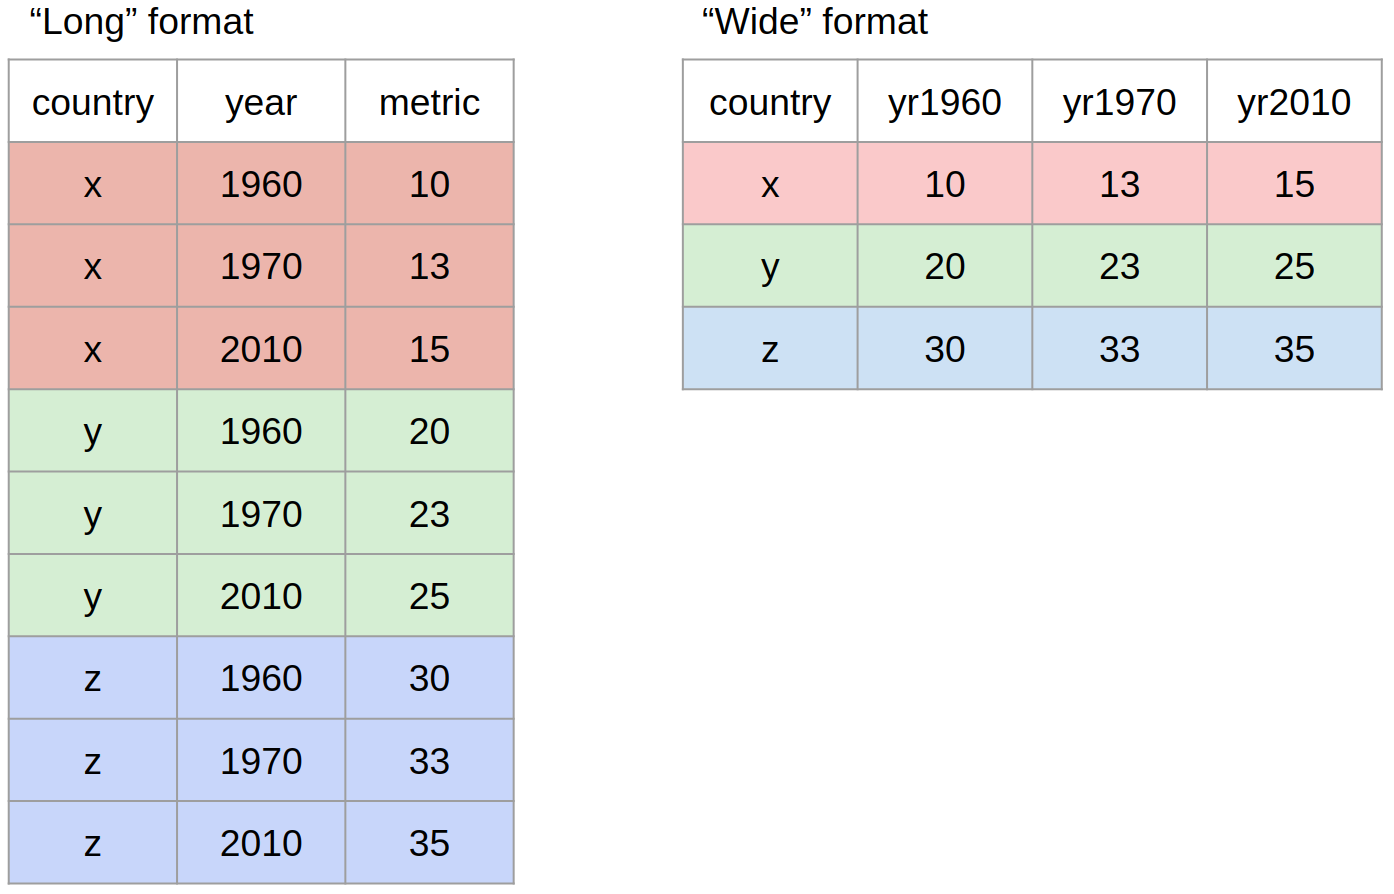

In [ ]:
df_season_hour = df.groupby(['season','hour'],as_index=False).agg({'registered':'mean'})
df_season_hour

In [ ]:
df_pivot = df_season_hour.pivot(index='hour',columns='season',values='registered')
df_pivot

In [ ]:
df_pivot.melt(ignore_index=False,value_vars=['autumn','spring','summer','winter'],value_name='count_registered')

## Menggabungkan data

2 fungsi utama untuk menggabungkan data adalah :
- pd.concat
- df.merge

## Concat data
Concat adalah operasi menempelkan 2 dataframe berdasarkan kesamaan nama kolom (untuk concat berdasarkan baris)

In [ ]:
df_pivot = df_pivot.reset_index()
df_pivot

In [ ]:
# Misal kita memisahkan data menjadi 2 berdasarkan jam
df_morning = df_pivot.query('hour.between(7,8)')
df_evening = df_pivot.query('hour.between(17,18)')
df_evening

In [ ]:
# Untuk menggabungkan kedua dataframe tersebut, simpan dataframe tersebut menjadi list of dataframe dan gunakan fungsi pd.concat

df_peak_hour = pd.concat([df_morning,df_evening])
df_peak_hour

## Data merging
Data merging di pandas ekuivalen dengan join di SQL  
Kita akan menggabungkan 2 dataframe berdasarkan suatu posisi kolom yang sama

In [ ]:
# Misal kita memisahkan data pivot berdasarkan jam dan kita acak urutannya
df_spring = df_pivot[['hour','spring']].sample(frac=1).reset_index(drop=True) # sample 1 untuk mengacak baris
df_autumn = df_pivot[['hour','autumn']].sample(frac=1).reset_index(drop=True) # sample 1 untuk mengacak baris
df_autumn

In [ ]:
# ini ekuivalen dengan 
# `from df_spring inner join df_autumn on df_spring.hour = df_autumn.hour`
df_spring.merge(df_autumn,on='hour',how='inner')

## Challenge

### TANPA MENGGUNAKAN RENAME, gabungkan `df_spring2` dengan `df_autumn`
Hint : pelajari dokumentasi https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [ ]:
df_spring2 = df_spring.rename(columns={'hour':'jam'})
df_spring2.head(2)